In [60]:
from sklearn.datasets import make_blobs
from scipy.stats import norm
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#fit a probability distribution to a univariate data smaple
def fit_distribution(data):
    #estimate parameters
    mu = mean(data)
    sigma = std(data)
    print(mu, sigma)
    #fit distribution
    dist = norm(mu, sigma)
    return dist
#generate 2d classification datasets
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [2]:
print(X.shape, y.shape)

(100, 2) (100,)


In [3]:
print(X[:5])
print(y[:5])

[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]]
[0 1 0 0 1]


In [4]:
#sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape , Xy1.shape)
#calculator priors (probability of y=0, y=1)
priory0 = len(Xy0)/ len(X)
priory1 = len(Xy1)/ len(X)
print(priory0, priory1)
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

(50, 2) (50, 2)
0.5 0.5
-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


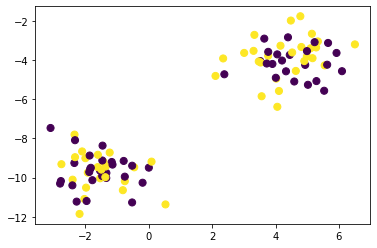

In [5]:
plt.scatter(Xy0, Xy1, c=y, s=50, cmap='viridis')

In [6]:
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

In [7]:
Xsample = X[4]
ysample = y[4]

In [8]:
py0 = probability(Xsample,priory0, distX1y0, distX2y0)
py1 = probability(Xsample,priory1, distX1y1, distX2y1)

In [9]:
print('P(y=0 | %s) = %.3f' % (Xsample, py0 * 100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1 * 100))
print('Truth : y=%d' % ysample)

P(y=0 | [-7.4693868  -4.20198333]) = 0.000
P(y=1 | [-7.4693868  -4.20198333]) = 0.435
Truth : y=1


In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
X,y = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 1)

In [12]:
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [13]:
Xsample, ysample = [X[0]], y[0]
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)

Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]


In [14]:
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

Predicted Class:  [0]
Truth: y=0


In [15]:
import random
import time
import pandas as pd

In [16]:
from sklearn.datasets import make_blobs

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, cluster_std = 1.2, n_features=2, random_state=42)

In [18]:
for i,j in enumerate(Y):
    if j ==0:
        Y[i] = -1
    elif j==1:
        Y[i] = 1
        
df = pd.DataFrame(dict(x=X[:,0], y = X[:,1], label = Y))

In [19]:
names = { -1:'Group 1', 1:'Group 2'}
colors = {-1:(0,100/255,0,0.9), 1:(138/255,43/255,226/255,0.9)}
grouped = df.groupby('label')

In [20]:
ex_line_x1 = np.linspace(-4,6,100)
ex_line_y1 = 1*ex_line_x1+4
ex_line_x2 = np.linspace(-4,6,100)
ex_line_y2 = 0.2*ex_line_x2+4.5
ex_line_x3 = np.linspace(-4,6,100)
ex_line_y3 = -0.1*ex_line_x3+5.5

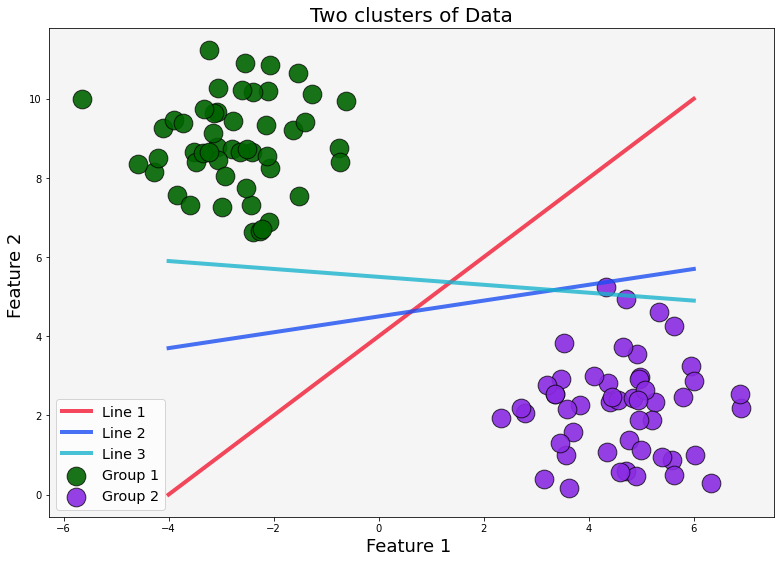

In [21]:
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(1,1,1)
ax.set_title('Two clusters of Data', fontsize = 20)
ax.set_xlabel('Feature 1 ', fontsize = 18)
ax.set_ylabel('Feature 2 ', fontsize = 18)
ax.set_facecolor((245/255,245/255,245/255))

for key, group in grouped:
    ax.scatter(group.x, group.y, label=names[key], color=colors[key], edgecolor=(0,0,0,0.75), s=350)
ax.plot(ex_line_x1, ex_line_y1, color=(0.95,0.1,0.2,0.8), label='Line 1', linewidth=4)
ax.plot(ex_line_x2, ex_line_y2, color=(0.1,0.3,0.95,0.8), label='Line 2', linewidth=4)
ax.plot(ex_line_x3, ex_line_y3, color=(0.1,0.7,0.8,0.8), label='Line 3', linewidth=4)
ax.legend(markerscale=1,fontsize='x-large')
plt.show()

In [22]:
#test
x_test = X[20:]
x_test = np.c_[x_test,np.ones(len(x_test))]
y_test = Y[20:]

#train
x = X[:20]
y= Y[:20]
#group for plotting
df_train = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
grouped_train = df_train.groupby('label')

#add bias to sample vectors
x = np.c_[x,np.ones(len(x))]

#initialize weight vector
w = np.zeros(len(x[0]))

In [23]:
import random
#learning rate
lam = 0.001
#array of numer for shuffling
order = np.arange(0,len(x),1)

margin_current = 0
margin_previous = -10

pos_support_vectors = 0
neg_support_vectors = 0

not_converged = True
t = 0
start_time = time.time()

while(not_converged):
    margin_previous = margin_current
    t += 1
    pos_support_vectors = 0
    neg_support_vectors = 0
    
    eta = 1/(lam*t)
    fac = (1-(eta*lam))*w 
    random.shuffle(order)
    for i in order:
        prediction = np.dot(x[i],w)
        
        if (round((prediction),1) == 1):
            pos_support_vectors +=1
        if (round((prediction),1) == -1):
            neg_support_vectors +=1
            
        if (y[i]*prediction) < 1:
            w = fac + eta*y[i]*x[i]
        else:
            w = fac
            
        if(t>1000):
            margin_current = np.linalg.norm(w)
            if((pos_support_vectors > 0)and(neg_support_vectors > 0)and((margin_current - margin_previous) <0.01)):
                not_converged = False
                
print("---%s seconds ---" % (time.time() - start_time))

---20.260550022125244 seconds ---


In [24]:
#create grid to draw decision boundary
grid_res = 200
xline = np.linspace(min(X[:,0]-(0.5*np.std(X[:,0]))),max(X[:,0]+(0.5*np.std(X[:,0]))),grid_res)
yline = np.linspace(min(X[:,1]-(0.5*np.std(X[:,1]))),max(X[:,1]+(0.5*np.std(X[:,1]))),grid_res)
grid = []
gridy = []
for i in range(grid_res):
    for j in range(grid_res):
        grid.append([xline[i],yline[j]])
        if (np.dot(w,[xline[i],yline[j],1]))>1:
            gridy.append((138/255,43/255,226/255,0.1))
            #gridy.append('lightsteelblue')
        elif (np.dot(w,[xline[i],yline[j],1]))<-1:
            gridy.append((0,100/255,0,0.1))
            #gridy.append('steelblue')
        elif (round((np.dot(w,[xline[i],yline[j],1])),2) == 0):
            gridy.append((0,0,0,1))
        else:
            gridy.append((245/255,245/255,245/255))
            
grid = np.asarray(grid)
gridy = np.asarray(gridy)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


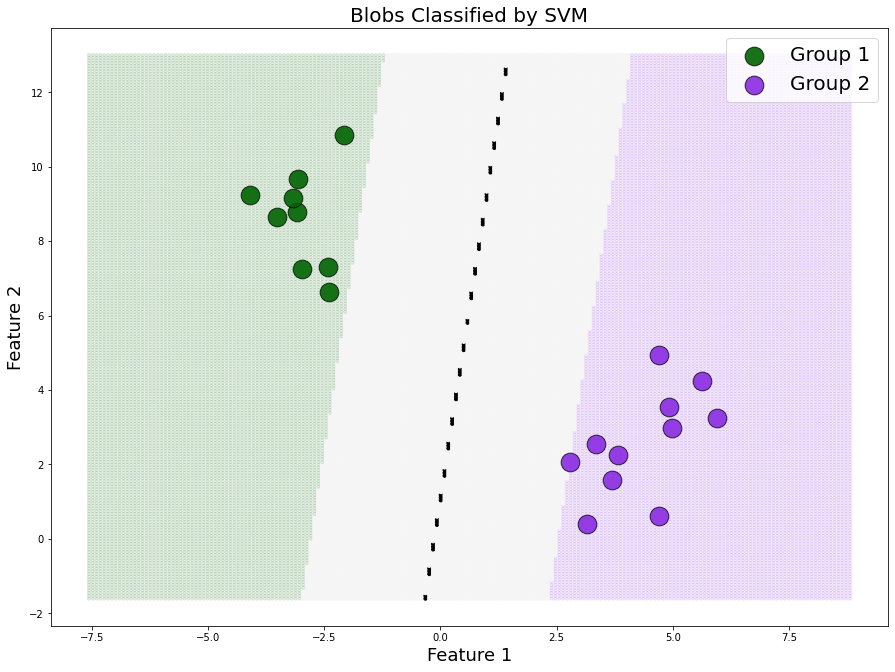

In [25]:
#plot the data
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Blobs Classified by SVM", fontsize=20)
ax.set_xlabel("Feature 1", fontsize=18)
ax.set_ylabel("Feature 2", fontsize=18)
ax.scatter(grid[:,0], grid[:, 1], marker='o',c=gridy,s=10)
for key, group in grouped_train:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolor=(0,0,0,0.75),s=350)
ax.legend(markerscale=1,fontsize=20,fancybox=True)
plt.show()

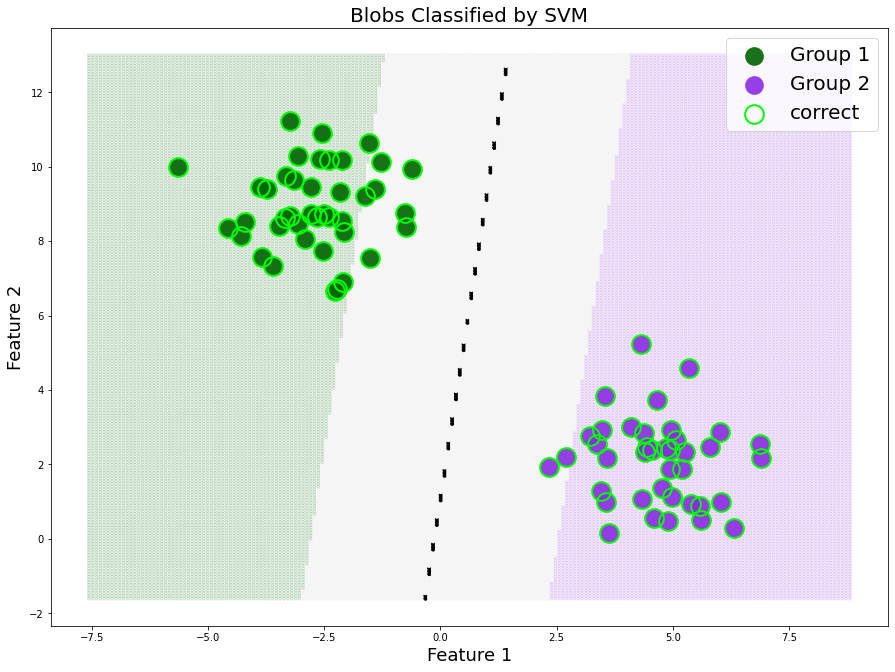

In [26]:
#test classifier on test set
y_pred = ([])
for i in x_test:
    pred = np.dot(w,i)
    if(pred > 0):
        {y_pred.append(1)}
    elif(pred < 0):
        y_pred.append(-1)
        

y_pred_labels =([])
for i,val in enumerate(y_pred):
    if(y_test[i] == y_pred[i]):
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)
        
#group for plotting
df_test = pd.DataFrame(dict(x=x_test[:,0], y=x_test[:,1], pred=y_pred_labels,label=y_test))
grouped_test = df_test.groupby('label')
grouped_pred = df_test.groupby('pred') 
pred_colors = {1:'lime', 0:'red'}
pred_names = {1:'correct',0:'incorrect'}

#plot decision grid with prediction values
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Blobs Classified by SVM", fontsize=20)
ax.set_xlabel("Feature 1", fontsize=18)
ax.set_ylabel("Feature 2", fontsize=18)
ax.scatter(grid[:,0], grid[:, 1], marker='o',c=gridy,s=10)
for key, group in grouped_test:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolor=(0,0,0,0),s=350)
for key, group in grouped_pred:
    ax.scatter(group.x,group.y,label=pred_names[key],color=(0,0,0,0),linewidth=2,edgecolor=pred_colors[key],s=350)
ax.legend(markerscale=1,fontsize=20,fancybox=True)
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[41  0]
 [ 0 39]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        39

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [165]:
from sklearn.metrics import accuracy_score
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/candy-data.csv')

In [166]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [167]:
X = df.drop(['pluribus','competitorname'], axis=1)
y = df['pluribus']

In [168]:
X['winpercent'] = (X['winpercent'] - min(X['winpercent'])) / (max(X['winpercent']) - min(X['winpercent']))
#x = (x - nр.min(x)) / (nр.mаx(x) - nр.min(x))

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [171]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy =', accuracy_score(y_test,y_pred)*100)

[[ 9  5]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.71      1.00      0.83        12

    accuracy                           0.81        26
   macro avg       0.85      0.82      0.81        26
weighted avg       0.86      0.81      0.80        26

accuracy = 80.76923076923077


In [172]:
svclassifier = SVC(kernel='poly', degree= 8)
svclassifier.fit(X_train, y_train)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy =', accuracy_score(y_test,y_pred)*100)

[[ 9  5]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.71      1.00      0.83        12

    accuracy                           0.81        26
   macro avg       0.85      0.82      0.81        26
weighted avg       0.86      0.81      0.80        26

accuracy = 80.76923076923077


In [173]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy =', accuracy_score(y_test,y_pred)*100)

[[ 9  5]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.71      1.00      0.83        12

    accuracy                           0.81        26
   macro avg       0.85      0.82      0.81        26
weighted avg       0.86      0.81      0.80        26

accuracy = 80.76923076923077


In [174]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy =', accuracy_score(y_test,y_pred)*100)

[[ 9  5]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.71      1.00      0.83        12

    accuracy                           0.81        26
   macro avg       0.85      0.82      0.81        26
weighted avg       0.86      0.81      0.80        26

accuracy = 80.76923076923077
